In [1]:
from fastai.vision.all import *

In [2]:
%pwd

'/home/ec2-user/SageMaker/fastbook/pups1/labrador'

In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
# %ls

In [5]:
%cd train

/home/ec2-user/SageMaker/fastbook/pups1/labrador/train


In [6]:
!ls

NORMAL	PNEUMONIA


In [7]:
# get_image_files??
# doc(DataLoaders)
path = '/home/ec2-user/SageMaker/fastbook/pups1/labrador/train'

In [8]:
get_image_files(path)

(#3543) [Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person1073_virus_1776.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person550_bacteria_2309.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person813_virus_1449.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person543_bacteria_2281.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person1248_bacteria_3204.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person1544_bacteria_4035.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person572_bacteria_2368.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person1423_bacteria_3650.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person1045_virus_1741.jpeg'),Path('/home/ec2-user/SageMaker/fastbook/pups1/labrador/train/PNEUMONIA/person

In [9]:
failed = verify_images(get_image_files(path))

In [10]:
# failed.map(Path.unlink):

In [11]:
# path = '/home/ec2-user/SageMaker/fastbook/pups1/labrador/train'
# dls = ImageDataLoaders.from_folder(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#     item_tfms=Resize(224)) 

In [12]:
#using fastai's datablock api 
pneumonia = DataBlock(
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files, 
            splitter = RandomSplitter(valid_pct=0.3, seed=42),
            get_y = parent_label,
            item_tfms = Resize(128))

In [13]:
# MAKES CUDA RUNS OUTTA MEMORY
# pneumonia1 = DataBlock(
#             blocks = (ImageBlock, CategoryBlock),
#             get_items = get_image_files, 
#             splitter = RandomSplitter(valid_pct=0.3, seed=42),
#             get_y = parent_label,
#             item_tfms = Resize(128), batch_tfms=aug_transforms())

In [14]:
dls = pneumonia.dataloaders(path)

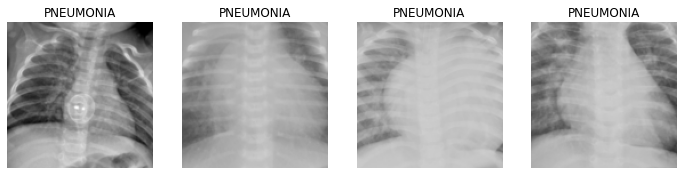

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)